In [1]:
from bb2022_functions import *
%matplotlib inline
from Bio.SeqIO.FastaIO import SimpleFastaParser
from Bio import SeqIO
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
md = pd.read_csv("metadata_merged.csv")
merged = pd.read_csv("metadata_niskin.csv")
all_md = pd.read_csv("allmetadata.csv")

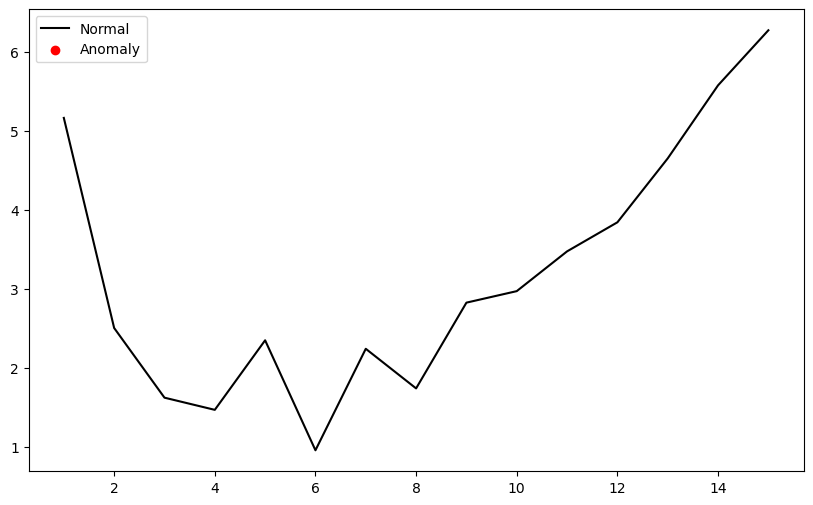

In [3]:
detect_anomalies('Temperature_y', all_md, 1, yr={2022}, month={1,2,3,4,5})

In [4]:
d1 = all_md.loc[all_md['depth'] == 1]
d1 = d1[['weekn', 'depth', 'Phosphate',
       'Ammonia', 'Chlorophyll A']]
d1.rename(columns={'Temperature_x': 'Temperature'},
          inplace= True)

In [5]:
d1 = d1.melt(id_vars=['weekn', 'depth'])

In [6]:
def get_stage(weekNb):
    if weekNb <8:
        return 'Pre-bloom'
    elif weekNb >= 8:
        return 'Bloom'

d1['Time'] = d1['weekn'].apply(get_stage)

In [7]:
df1 = d1[d1['Time'] == 'Bloom']
df2 = d1[d1['Time'] == 'Pre-bloom']

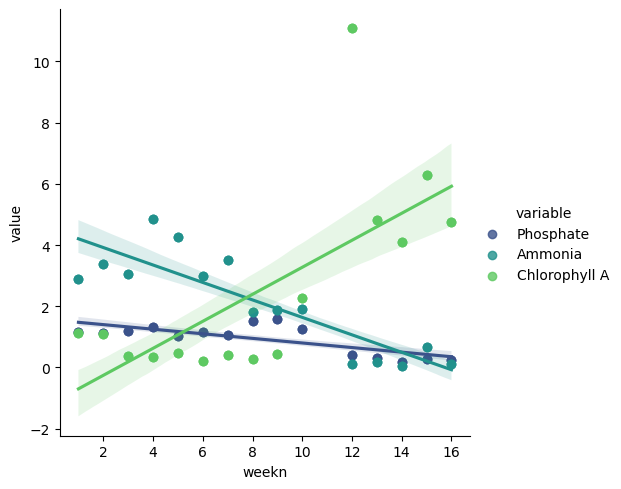

In [8]:
sns.lmplot(
    data = d1,
    x="weekn", y="value",
    hue = 'variable', palette = 'viridis', scatter=True
)

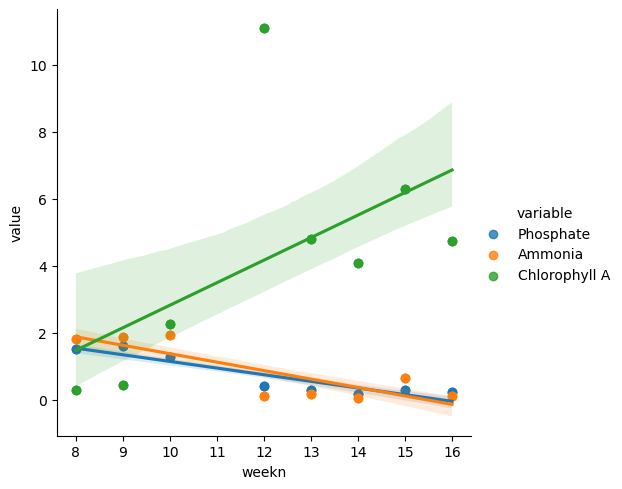

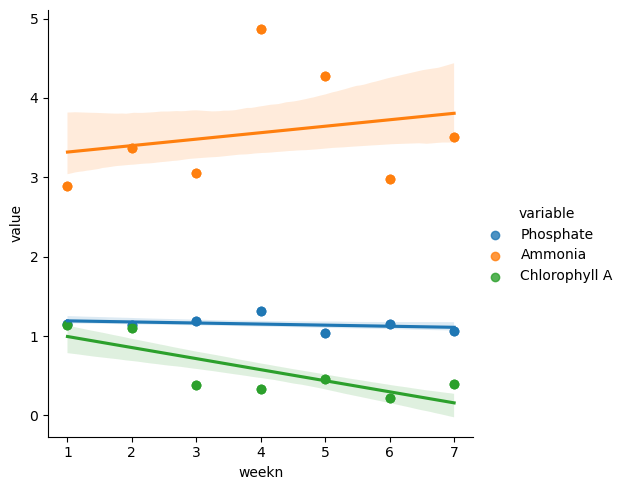

In [9]:
sns.lmplot(x='weekn', y='value', data=df1, hue='variable') 
sns.lmplot(x='weekn', y='value', data=df2, hue='variable')

In [10]:
d1.drop_duplicates(inplace=True)
d1.set_index('weekn', inplace=True)